HOUSE PRICE PREDICTION

In [6]:
import pandas as pd

# Load the dataset with space as the delimiter
boston = pd.read_csv(r"C:\Users\Swarathmica\Downloads\archive (2)\housing.csv", delim_whitespace=True, header=None)

# Define the column names based on the Boston housing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston.columns = column_names

# Display the first few rows
print(boston.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


C:\Users\Swarathmica\AppData\Local\Temp\ipykernel_5196\108765603.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  boston = pd.read_csv(r"C:\Users\Swarathmica\Downloads\archive (2)\housing.csv", delim_whitespace=True, header=None)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = boston.drop(columns=['MEDV'])
y = boston['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)


c:\Users\Swarathmica\AppData\Local\Programs\Python\Python310\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 614.1826 - val_loss: 523.4115
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 564.7371 - val_loss: 481.4868
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 520.4061 - val_loss: 434.6269
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 454.9301 - val_loss: 380.2952
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 427.6242 - val_loss: 318.3027
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 335.3125 - val_loss: 251.2421
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 257.3546 - val_loss: 185.7618
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 186.0036 - val_loss: 127.9151
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 122.6368 - val_loss: 84.7191
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 90.8035 - val_loss: 59.0857
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 65.6281 - val_loss: 45.2545
Epoch 12/100
11/11 ━━━━

Mean Squared Error on Test Set: 12.68750286102295


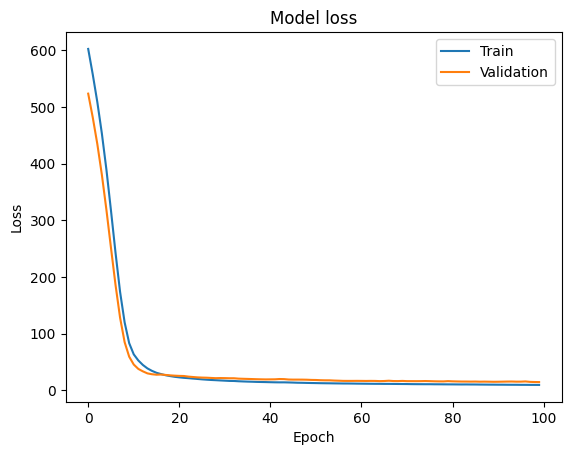

In [9]:
import matplotlib.pyplot as plt

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Mean Squared Error on Test Set: {loss}')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
